<a href="https://colab.research.google.com/github/sofialuthier/license_plate_detection/blob/main/license_plate_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0.install and import dependencies**

In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.7 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt
import imutils
import numpy as np
import easyocr

**1.read in image , grayscale and blur **


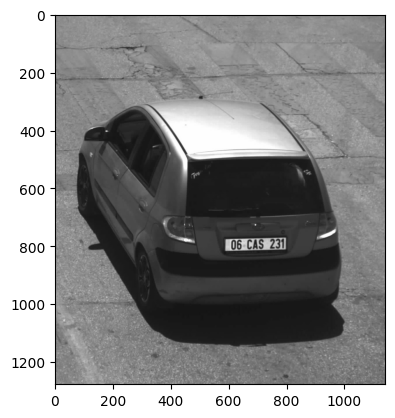

In [ ]:
img=cv2.imread('06CAS231.jpg')

#cv2.rectangle(img,(250,300),(350,320),[0,0,255],3) #sonra eklenmeli

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

 **2.apply filter and find edges for localization**

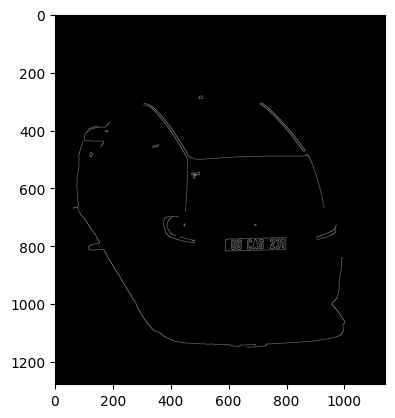

In [ ]:
bfilter=cv2.bilateralFilter(gray,7,200,200) #noise reduction
edged=cv2.Canny(bfilter,40,200) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

**3.Find contours and apply mask**

In [ ]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10] #contour in area top of 10

In [ ]:
location=None
for contour in contours:
  approx =cv2.approxPolyDP(contour,5,True)
  if len(approx)==4: #cause of 4 detection in plate
    location=approx
    break

In [ ]:
print (location)

[[[796 773]]

 [[590 777]]

 [[587 815]]

 [[794 812]]]


In [ ]:
mask=np.zeros(gray.shape,np.uint8)#shape= hight weight and channel
new_mask=cv2.drawContours(mask,[location],0,(255,255,255),-1) #255 is the white color
new_image=cv2.bitwise_and(img,img,mask=mask)

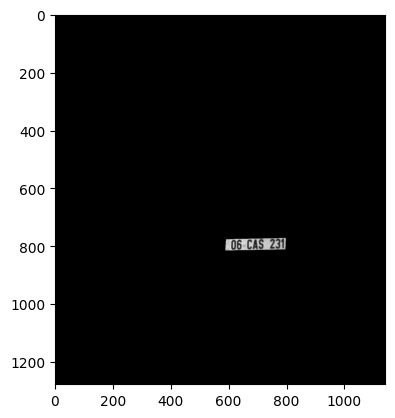

In [ ]:
#plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(new_mask,cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

**4.Use Easy OCR To Read Text**

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y)) #first corner in plate
(x2,y2)=(np.max(x),np.max(y)) #second corner in plate
cropped_image=gray[x1:x2+1,y1:y2+1]

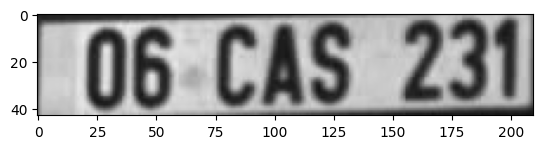

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [ ]:
reader=easyocr.Reader(['en'])
result= reader.readtext(cropped_image) #it is not corretly ansxer but it enough just that
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[12, 0], [210, 0], [210, 43], [12, 43]], '06 CAS231', 0.595700046043824)]

**5.Render Result **

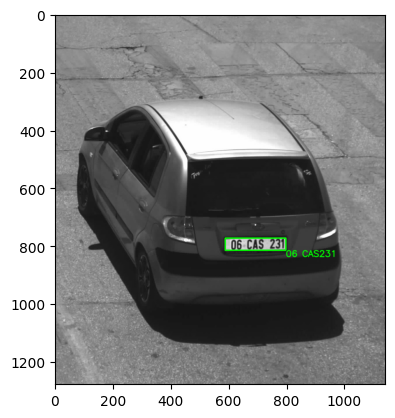

In [ ]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

**Save Results **

In [ ]:
import csv
import uuid


In [ ]:
def save_results(text,region,csv_filename,folder_path):
  img_name='{}.jpg'.format(uuid.uuid1())